## Background / Motivation
As a group, we have many interests in music at different levels. Our perspectives range from aspiring music industry professionals, to producers and learning DJs, to just music enjoyers. The general population follows a similar story to ours: they are either interested in behind the scenes work, creating music, or they simply enjoy listening to music. 

The music industry is a multi-billion dollar business where everyone is involved. The creative, the administration behind the creative, and the consumer are all integral to the industry’s success. With music streaming being the most popular way of music consumption, and the ease of accessibility, it’s very difficult to break out of the mold and stand apart from the rest of the pack. 

Spotify, being the most popular music streaming platform, has its own internal system for categorizing features of songs with numerical values. To create a profitable song, it must be popular. With this in mind, we wanted to create a regression model that can predict what songwriting and textural features musicians can employ to make their songs more popular, therefore increasing their chances of a profitable track.


## Problem statement 

Our analysis aims to use a linear regression model to predict the popularity of a song on Spotify based on audio features accessible from the Spotify API.

## Data sources
We used a publicly available dataset from Kaggle, which was created by accessing the Spotify API. The data contained seven CSV files of popular songs by decade from 1950-2019. There are 22 variables representing audio features such as danceability and loudness. A few variables do not have intuitive meanings — loudness is represented in decibels (dB), and valence represents how positive a song sounds.  

The description for each audio feature can be found at [4].  

See [1] for link to Kaggle dataset.

## Stakeholders
The primary stakeholders for this project are songwriters, producers, artist managers, and record label professionals. These stakeholders are either trying to write and produce songs, or they are seeking and developing talent who are likely to produce hits. By analyzing the relationship between these different variables, these stakeholders can get a better insight into what kind of music may help them succeed. Through this project, these stakeholders can gain access to insights that could increase monetary gain, shape songwriting choices, and influence which artists are assigned to streaming rosters. 

## Data quality check / cleaning / preparation 

Once we obtained all the necessary csv files, we concatenated them together to create one large dataset with 667 observations. The resulting dataset had no missing or inconsistent values, so any data cleaning or missing value imputation was unnecessary. Before concatenating the individual dataframes, we created a “Decade” variable to mark which decade a particular song belonged to. However, since our task was prediction and not inference, we did not use the ‘Decade’ or ‘Year’ variables as predictors since an artist does not control the year or decade they release their song in. To prepare our data, we split the data into a train dataset and test dataset with a 80-20 split. Data wrangling was not necessary to prepare the data for model development. With our initial data quality check, we found that the popularity values only ranged from 20 to 100, while the actual range is 0 to 100. This presents a limitation of model interpretability that will be discussed later. Finally, we performed a check for multicollinearity among the predictors, and found that because the variance inflation factor values were low (see Figure 1), there was no significant multicollinearity present.



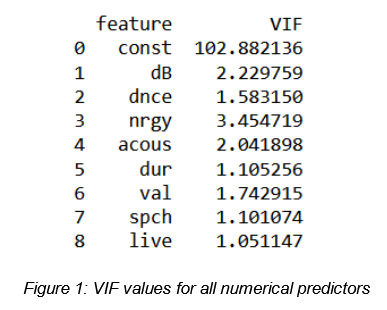

## Exploratory data analysis

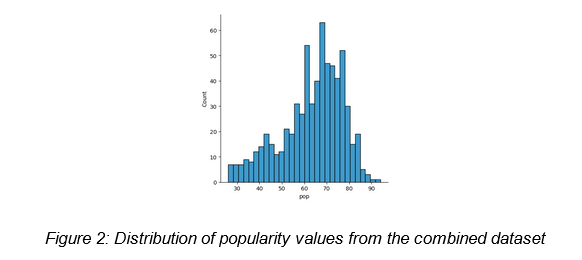

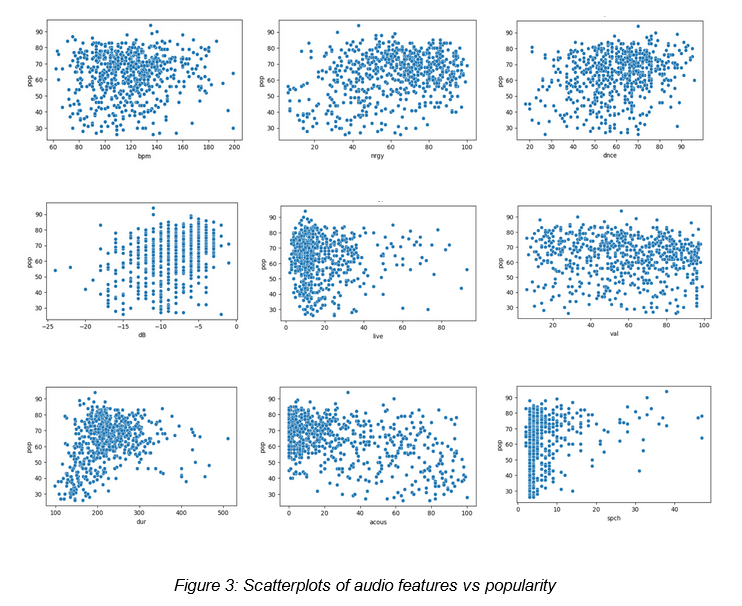


* Figure 2 indicates that the popularity variable distribution is not representative of all songs on Spotify, due to the minimum pop value not dropping below 20.
* As seen in Figure 3, many predictors appear to have a weak linear relationship with the response, popularity (pop) due to significant noise in the data.
* However, the popularity vs. duration plot seems to indicate that duration has a pseudo-quadratic/square root/logarithmic relationship with pop. This was tested during model development.


## Approach
Spotify’s popularity metric runs on a scale from 0 to 100, so we built a linear regression model to predict popularity. We decided to use mean absolute error (MAE) as our evaluation metric, as opposed to the commonly used root mean squared error (RMSE). We reasoned that due to the unavoidable noise in the data, some instances of high deviation from the regression were to be expected, which we did not want to severely penalize. This noise is one of the primary problems that we anticipated. The other, more important problem that we encountered is that we don’t actually know what the popularity metric entails. The only information that Spotify has provided is that popularity is based on recent streams.  

As part of our initial approach, we performed a brief literature review to see whether this problem had been solved before. A few previous attempts at this subject were discovered. [Nijkamp 2018](https://essay.utwente.nl/75422/1/NIJKAMP_BA_IBA.pdf) [2] analyzed the relationship between a song’s audio features and its stream count, as opposed to popularity, restricting their data collection to the year 2017 to prevent biasing results in favor of older songs with more time to collect streams. Similarly to us, [Peker 2021](https://towardsdatascience.com/predicting-popularity-on-spotify-when-data-needs-culture-more-than-culture-needs-data-2ed3661f75f1) [3] predicted popularity using audio features, and achieved an MAE of 13.24. Although we used a different dataset from them, this provided a baseline for us to compare our results with.

## Developing the model

To develop the base model, we first performed variable selection to obtain the optimal subset of predictors. We initially attempted best subset selection to obtain the true optimal subset, but were limited by computing power. So, we opted to perform forward stepwise selection. The BIC metric showed that the best model has 6 predictors: acousticness, duration, loudness (dB), energy, danceability, and valence (how positive a song is). We calculated our initial training MAE and found it to be *8.526617*, with a test MAE of *10.48505*. 

Forward stepwise two-factor interaction variable selection was also performed. This provided a model with 8 predictors. However, even after model testing with transformations, the test MAE did not improve from the no-interaction model. So, we decided to use the no-interaction model with 6 predictors as our baseline. 

For variable transformation, we tried quadratic, square root, and logarithmic transformations for duration, motivated by our observations from the exploratory data analysis. Adding these transformation terms to the baseline and comparing their performance, we found that the logarithmic transformation produced the best performance among the three transformations, and so decided to include the log transformation of duration in our final model. 

From the subsetted variables and log-transformed variable, we tested a few interactions based on correlation values, but these did not improve the performance. We then tried a few intuitive interaction terms between energy-danceability, acousticness-energy, and duration-danceability. The energy-danceability interaction yielded the best performance with regard to test MAE, so our final model used the 6 predictors obtained through variable selection, the energy-danceability interaction term, and the log-transformed duration variable. The final model had a training MAE of *8.053615*, and had the lowest test MAE of all the models at *9.632205*, despite the fact that a model with acousticness-energy and duration-danceability interaction terms had a better R-squared with no insignificant predictors. Even though the final model had the best test MAE, there was one insignificant predictor in the model. Although our focus was not inference, we decided to perform regularization to ensure our model was not overfitting. 

Before regularization, we performed a check on the model to ensure that it met all the linear modeling assumptions, namely the linearity and constant variance assumptions along with outlier detection. After creating the residual plot in Figure 4, we found that the model generally satisfied these assumptions. However, we observed a few potential outliers that warranted further investigation. We created the studentized residual plot in Figure 5, which showed us that there were 3 outliers. In order to check if these were influential points, we calculated the leverage of each point and discovered 6 high leverage points. However, no observations were both outliers and high leverage points, so we determined that no influential points were present. So, no outliers were removed.



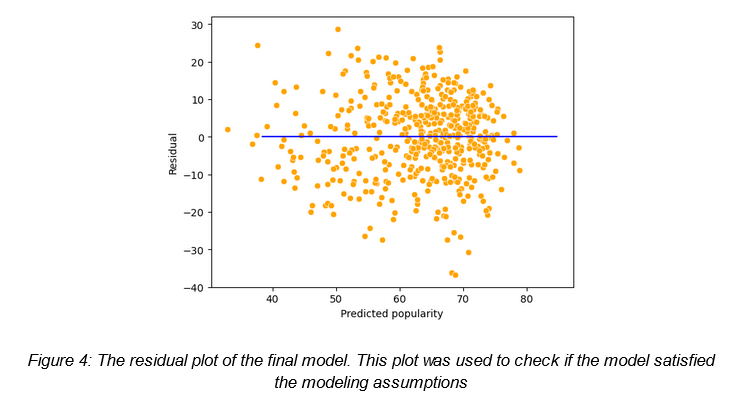

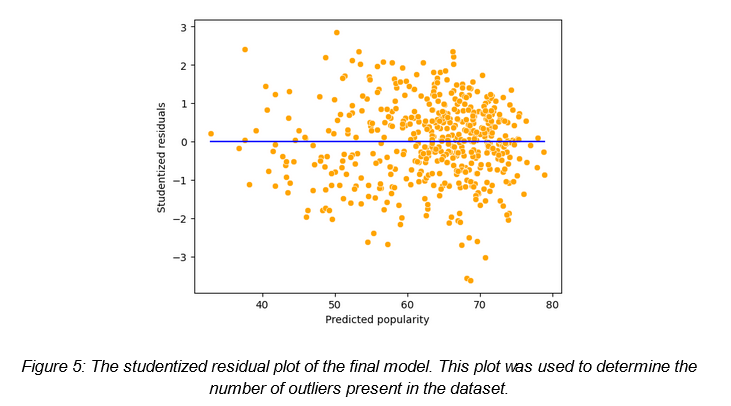

We opted to perform lasso regression to shrink the coefficients of insignificant predictors to zero. To perform regularization, we standardized the training and test datasets to minimize the effect of higher-magnitude predictors. We also visualized the shrinkage in lasso coefficients with increasing values of the tuning hyperparameter lambda, as shown in Figure 6.  



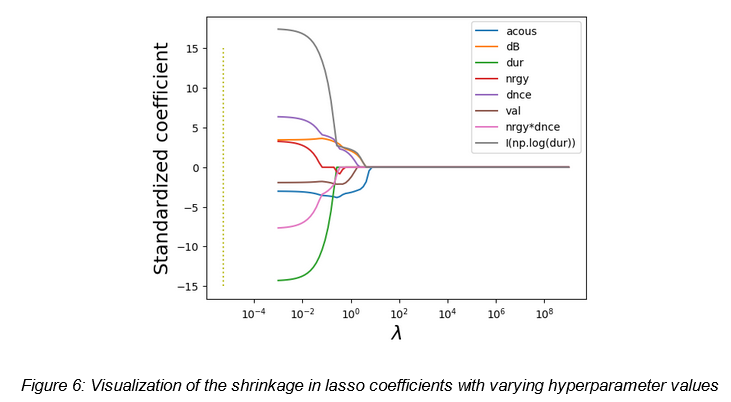



We found that after using the LassoCV package from scikit-learn, our optimal hyperparameter was approximately 5.48 x 10-9, which means that introducing regularization had minimal effect on our actual coefficients. To test our regularized model, we computed a test MAE calculated using the standardized test dataset, and found that the MAE from the regularized model was *9.632211*. This MAE was not significantly different from the pre-regularized model; therefore, we concluded that our model is not overfitting. Figure 7 shows the model summary of our final model. Given that our model achieved a better test performance than previous work on the subject, we considered our work to be a success.

### Final Equation Model
`pop`= -0.1078 x `acous`+ 0.9601 x `dB`-0.2426 x `dur`+0.1570 x `nrgy`+0.4220 x `dnce`-0.0045x(`nrgy` x `dnce`) -0.0794 x `val` +68.4033 x log(`dur`)  


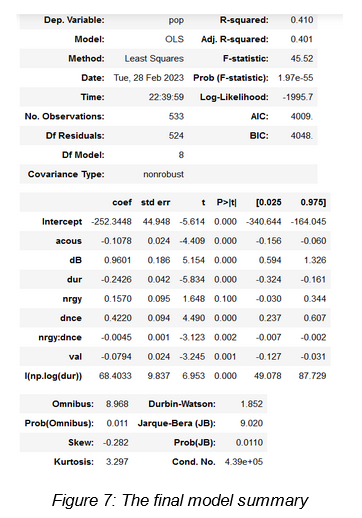

## Limitations of the model with regard to inference / prediction

Our findings are constrained by the fact that both the predictors and response are metrics defined by Spotify without an objective way to calculate them besides its own black box algorithm. With the exception of loudness and duration, an artist cannot exactly determine how “energetic” or how “danceable” their own song is. As a result, it would be difficult for stakeholders to put our model into practice given that even generating the predictor values is an obstacle in itself. 

In addition to the data’s inherent limitations, the strength of our conclusions is also limited by the size of our dataset and its timeliness. Our dataset had less than 700 songs, while Spotify has millions of songs in its catalog. As previously mentioned, this dataset only contained songs within a popularity range from 20 to 100, which was not representative of the true spectrum of popularity where many songs fall in the 0-20 range. Additionally, the Kaggle dataset was last updated 3 years ago with no data from the current decade, the 2020s. Since the music industry is constantly evolving, it’s hard to say whether these trends will continue into the future. It’s possible that our model will slowly become obsolete, as future decades bring new trends in what makes a song popular. In order to address these limitations, we attempted to expand our data by accessing Spotify’s API ourselves; however the data was too noisy to see observable trends. This remains an area for improvement. 

The final limitation is that music is simply too subjective to be concretely predictable based on any audio metric. One could write a song with the same audio features as a popular song yet never receive even half of that song’s popularity. Other factors influence the way that songs become popular, like lyrical content, vocal performance, or charisma. These are not measured with Spotify’s metrics, so they are not variables we can test. With all of these constraints and caveats in mind, our results provide a general framework for how artists and managers should tailor their songwriting to cater towards ‘rule-of-thumb’ trends for songs that become popular.


## Conclusions and Recommendations to stakeholder(s)
Our final model achieved a satisfactory performance via test MAE, outperforming previous attempts to solve this problem. It did not overfit as evidenced by the test MAE outperforming the train MAE. So, our model is suitable for prediction.

Based on our model and insights, our recommendation to our stakeholders is to focus more on creating or marketing songs that have more energy, danceability, and loudness. These features help boost the popularity of a track. Songs with these features are those that you would hear at clubs; they are loud and good to dance to. Shorter songs are shown to be more popular, along with songs that have less acoustic instrumentation. With this insight, we also recommend decreasing the duration and acousticness as well. 

Given how noisy the actual Spotify API data is, and the limitations of our dataset, we will not give a specific value to reach for each feature, and testing the model with current data from songs released in 2022 and 2023 will give better insights into the timelessness of our model. Even so, we believe that with many decades of data, and a solid performance of the model, our recommendations to stakeholders hold as guidelines for writing songs that have the potential to be hits.


## GitHub and individual contribution {-}

**GitHub Link:** https://github.com/albertwang195/Geriatrics

Add details of each team member's contribution in the table below.

<html>
<style>
table, td, th {
  border: 1px solid black;
}

table {
  border-collapse: collapse;
  width: 100%;
}

th {
  text-align: left;
}
    

</style>
<body>

<h2>Individual contribution</h2>

<table style="width:100%">
     <colgroup>
       <col span="1" style="width: 15%;">
       <col span="1" style="width: 20%;">
       <col span="1" style="width: 50%;">
       <col span="1" style="width: 15%;"> 
    </colgroup>
  <tr>
    <th>Team member</th>
    <th>Contributed aspects</th>
    <th>Details</th>
    <th>Number of GitHub commits</th>
  </tr>
  <tr>
    <td>Albert Wang</td>
    <td>EDA, Model testing, Regularization</td>
    <td>Literature review of prior work on the subject. Performed initial EDA and model testing. Checked for overfitting with regularization. Also attempted to expand data through Spotify API but data was too noisy.</td>
    <td>23</td>
  </tr>
  <tr>
    <td>Grant Li</td>
    <td>Variable Selection, model testing</td>
    <td>Attempted logistic regression, then variable subsetting of various methods. Tested models for improvement.</td>
    <td>28</td>
  </tr>
    <tr>
    <td>Nate Kim</td>
    <td>EDA, Model testing, Regularization</td>
    <td>Developed visualizations to identify appropriate variable transformations. Tested models using the subset of predictors taken from forward stepwise selection. Checked for overfitting with regularization. Also performed outlier detection and checked for multicollinearity.</td>
    <td>38</td>    
  </tr>
    <tr>
    <td>Kegan Grace</td>
    <td>EDA, model testing, variable selection</td>
    <td>Combined and manipulated CSV files for EDA, ran correlation tables and created visualizations for variable and transformation insights. Checked collinearity with VIF for variables. Ran variable selection (best subset with and without interactions, forward stepwise). Created models with test RMSE to check overfitting.</td>
    <td>21</td>    
  </tr>
</table>

### GitHub Challenges

GitHub provided a streamlined way to collaborate - however, this came at the cost of needing to use extra caution when working on files inside the repo. Sometimes it felt like walking on eggshells opening a notebook while someone else also had it open and making sure not to cause any conflicts that would then have to be resolved. With that said, this is probably something we will get used to if we use the tool more.

## References {-}

[1] Carbone, Nicholas. 2020. Spotify Past Decades Songs Attributes. Retrieved 23 January 2023 from https://www.kaggle.com/datasets/cnic92/spotify-past-decades-songs-50s10s.

[2] Nijkamp, Rutger. “Prediction of Product Success: Explaining Song Popularity by Audio Features” University of Twente, 11th IBA Bachelor Thesis Conference, 10 July 2018, https://essay.utwente.nl/75422/1/NIJKAMP_BA_IBA.pdf. 

[3] Peker, Philip. “Predicting Popularity on Spotify - When Data Needs Culture More than Culture Needs Data.” Medium, Towards Data Science, 17 Nov. 2021, https://towardsdatascience.com/predicting-popularity-on-spotify-when-data-needs-culture-more-than-culture-needs-data-2ed3661f75f1. 

[4] “Web API Reference.” Home, Spotify for Developers, https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features. 
